In [ ]:
# default_exp gbe.ema_drinking

# EMA drinking

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.ist.data_provider import ISTDataProvider
from trr265.gbe.wm.data_provider import WMDataProvider
from trr265.gbe.sst.data_provider import SSTDataProvider
from trr265.gbe.rtt.data_provider import RTTDataProvider

import trr265.gbe.ist.scoring as ist_scoring 
import trr265.gbe.wm.scoring as wm_scoring 
import trr265.gbe.sst.scoring as sst_scoring 
import trr265.gbe.rtt.scoring as rtt_scoring 

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

### Information sampling task

In [ ]:
# Getting raw data
dp = ISTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_ist_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
ist = ist_scoring.get_oversampling_predicted_joint(df)[0]
ist = ist.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
#ist = ist.groupby('participant').mean()
ist = ist.rename(columns = {"oversampling_predicted_joint":"ist_oversampling"})

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




### Working memory task

In [ ]:
# Getting raw data
dp = WMDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_wm_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
# Filtering participants with old app
df = dp.filter_old_app_sessions(df)
df = dp.filter_level_two_failures(df)
wm = wm_scoring.get_perc_correct_predicted_sep_trial(df)[0]
wm = wm.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
wm = wm.rename(columns={'perc_predicted_sep_trial_no_distractor_1': 'wm_no_1',
                       'perc_predicted_sep_trial_no_distractor_2': 'wm_no_2',
                       'perc_predicted_sep_trial_encoding_distractor': 'wm_encoding',
                       'perc_predicted_sep_trial_delayed_distractor':'wm_delayed'})

5 participants used an old version of the task in some of their sessions.  19 sessions (0.82%) were removed from the dataset.
28 sessions (1.22%) were removed because participants failed a level two trial.


### Risk taking task

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
rtt = rtt_scoring.get_perc_gamble_predicted_joint(df)[0]
rtt = rtt.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
rtt = rtt.rename(columns={'perc_gamble_joint_win': 'rtt_win',
                       'perc_gamble_joint_loss': 'rtt_loss',
                       'perc_gamble_joint_mixed': 'rtt_mixed'})

### Stop signal task

In [ ]:
# Getting raw data
dp = SSTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_sst_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
df = df.query("is_initial and (is_baseline==False)")
sst = sst_scoring.get_ssrt_predicted_joint(df)[0]
sst = sst.merge(dp.get_gbe_data(columns = ['participant','session_number']), left_on = 'gbe_index', right_index = True, how = 'left')
sst = sst.rename(columns = {'ssrt_predicted_joint':'ssrt'})

In [ ]:
sst.to_csv('../data/processed/sst_predicted_joint_longitudinal.csv')
wm.to_csv('../data/processed/wm_predicted_joint_longitudinal.csv')
rtt.to_csv('../data/processed/rtt_predicted_joint_longitudinal.csv')
ist.to_csv('../data/processed/ist_predicted_joint_longitudinal.csv')

### Drinking

In [ ]:
initial_participants = dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']).query("is_initial").participant.unique()
len(initial_participants)

300

### AUD criteria

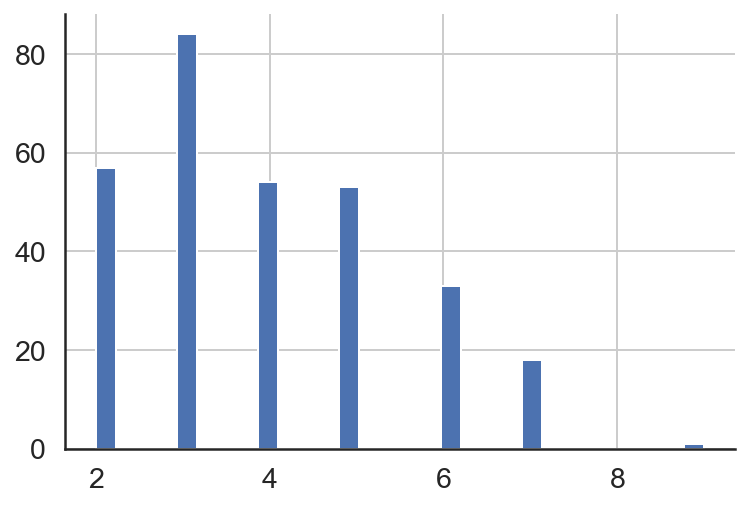

In [ ]:
ba = dp.get_ba_data(columns = ['redcap_event_name','mov_id','bx_aud_sum']).query("redcap_event_name=='erhebungszeitpunkt_arm_1'")
ba = ba[ba.mov_id.isin(initial_participants)]
aud = ba[~ba.bx_aud_sum.isnull()][['mov_id','bx_aud_sum']]
aud.columns = ['participant','aud']
aud = aud.groupby('participant').first()
aud.aud.hist(bins = 30)
sns.despine()

### Drinking days
16 participants did not report to drink any alcohol during the first EMA month.

In [ ]:
two_day = dp.get_two_day_data()
#drinking_days = two_day.query("sampling_day<30")#.groupby('participant').g_alc.agg(['mean','median'])
#drinking_days['drinking_days'] = ema_drinking.g_alc>0
#drinking_days = drinking_days.groupby('participant')[['g_alc','drinking_days']].sum().reset_index()
#drinking_days = drinking_days[drinking_days.participant.isin(initial_participants)].set_index('participant')

In [ ]:
tasks = pd.concat([wm, sst, rtt,ist],axis = 1).dropna()
tasks = tasks.loc[:,~tasks.columns.duplicated()]

In [ ]:
df = tasks.merge(dp.get_gbe_data(columns = ['trigger_date','time_since_last_gbe','ema_session']), on = 'gbe_index', how = 'left')

<AxesSubplot:>

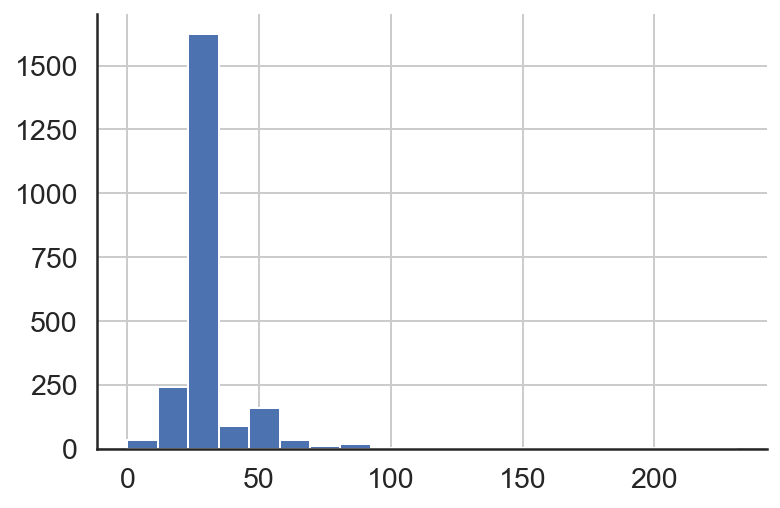

In [ ]:
df.time_since_last_gbe.hist(bins = 20)

> The distance between sessions is mostly 28 days. Some distances are longer (probably due to skipped sessions). Very few are, however also mach shorter.

In [ ]:
df['time_to_next_gbe'] = df.time_since_last_gbe.shift(-1)
# Send maximum to 28 days
df['time_to_next_gbe'][df['time_to_next_gbe'] >= 28] = 28
df.time_to_next_gbe.fillna(28,inplace = True)

> Here we use the distance to the next session or a maximum of 28 days as the window in which we will aggregate drinking data.

> ToDo: This function should be generalized to allow for other windows for exploratory analyses.

In [ ]:
df['end_date'] = df.trigger_date + pd.to_timedelta(df.time_to_next_gbe, unit = 'd')

In [ ]:
two_day['gbe_index'] = None
# Not pretty but it should work
for s in df[['trigger_date','end_date','participant']].reset_index().iterrows():
    gbe_index = s[1].loc['gbe_index']
    starting_date = s[1].loc['trigger_date']
    end_date = s[1].loc['end_date']
    participant = s[1].loc['participant']
    selection = two_day.query('(participant==@participant) and (date<@end_date) and (date >= @starting_date)').index
    two_day.loc[selection, 'gbe_index'] = gbe_index
    
print(end_date)

2021-08-30 15:47:07


In [ ]:
import numpy as np
two_day['drinking_days'] = two_day.g_alc>0
two_day['limit'] = two_day['limit']-1
drinking = two_day.groupby('gbe_index').agg({'g_alc':[np.mean, np.median, np.sum],'drinking_days':np.sum,'limit':[np.median], 'control':np.mean})
drinking.columns = ['_'.join(col).strip() for col in drinking.columns.values]
drinking.loc[drinking.g_alc_mean.isnull(), 'drinking_days_sum'] = np.nan
drinking['g_alc_per_drinking_day'] = drinking['g_alc_sum']/drinking['drinking_days_sum']
drinking = drinking[['g_alc_mean','g_alc_median','g_alc_per_drinking_day','limit_median','control_mean']]

## Task score correlations

In [ ]:
#cor[cor.g_alc_median!=0]

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
import biuR

def pearson_r(x, y, df):
    return scipy.stats.pearsonr(df[x], df[y])
    

#export
def lmer(x, y, df):    
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + (1 | participant), data=df, na.action = na.exclude) 
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[10]
    """%{'x':x,'y':y},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]

lmer('wm_no_1','g_alc_mean',cor)

(-6.2146321320613, 0.09530903937780459)

In [ ]:
import scipy

def correl(df, corr_func = pearson_r):
    df_corr = pd.DataFrame() # Correlation matrix
    
    df_p = pd.DataFrame()  # Matrix of p-values
    for x in df.drop(columns='participant').columns:
        for y in df.drop(columns='participant').columns:
            try:
                if x==y:
                    corr = (1,0)
                corr = corr_func(x, y, df)
                df_corr.loc[x,y] = corr[0]
                df_p.loc[x,y] = corr[1]
            except:
                df_corr.loc[x,y] = np.nan
                df_p.loc[x,y] = np.nan

    return df_corr, df_p

def correlation_matrix(analysis_data, alpha = .05, bonferroni = False, size = (11,9), show_correl = True, corr_func = pearson_r):
    print(len(analysis_data))

    if bonferroni:
        variables = len(analysis_data.columns)
        correction = ((variables * variables) - variables)/2
        alpha = alpha / correction

    df_corr, df_p = correl(analysis_data, corr_func = corr_func)
    
    #sig = (df_p < alpha).replace({True:"*",False:""})
    
    sig = df_p
    sig.where(sig>=.001).fillna(2)
    sig = sig.where(sig>=.01).fillna(3)
    sig = sig.where(sig>.05).fillna(4)
    sig = sig.where(sig>1).fillna(5)
    sig = sig.replace({2:"***"})
    sig = sig.replace({3:"**"})
    sig = sig.replace({4:"*"})
    sig = sig.replace({5:""})

    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=size)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    df_corr_label = df_corr.applymap(lambda x: ('%.2f'%x).replace('0.','.'))
    try:
        df_corr_label = df_corr_label + sig
    except:
        df_corr_label = "err"
    if show_correl:
        p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},
                   annot=df_corr_label,fmt = '')
    else:
         p1 = sns.heatmap(df_corr, mask=mask,cmap=cmap, center=0, vmax=1, vmin=-1,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt = '')       
    #p1.text(len(df_corr)-1, 1, "Alpha = %g"%alpha, size='medium', color='black')
    p = df_p.unstack()
    p.index = ['*'.join(map(str,i)) for i in p.index.tolist()]
    p = p.to_dict()
    corr = df_corr.unstack()
    corr.index = ['*'.join(map(str,i)) for i in corr.index.tolist()]
    corr = corr.to_dict()
    

In [ ]:
labels = {
    "wm_no_1":"no distractor (long)",
    "wm_no_2":"no distractor (short)",
    "wm_encoding":"encoding distractor",
    "wm_delayed":"delayed distractor",
    "rtt_win":"% gambles (win)",
    "rtt_loss":"% gambles (loss)",
    "rtt_mixed":"% gambles (mixed)",
    "ist_oversampling":"oversampling",
    "last_three_month":"Drinks per day",
    "g_alc_per_day_last_three_month":"g/alc per day",
    "g_alc_per_drinking_day_last_three_month":"g/alc per drinking day",
    "drinking_days_last_three_month":"Drinking days",
    "aud":"AUD criteria",
    "g_alc_mean":"Mean consumption",
    "g_alc_median":"Median consumption",
    "drinking_days":" Drinking days",
    "g_alc_per_drinking_day":" g/alc per drinking day"
}

next step: change window of drikning and beetter nan handling

### Based on mixed models
e.g., `g_alc_mean ~ ssrt + (1|participant)`

In [ ]:
def lmer_within_between(x, y, df, model_output = False): 
    if '_'.join(x.split('_')[:-1]) == y:
        return np.nan, np.nan
                
    if ('within' in x+y) and ('between' in x+y):
        return np.nan,np.nan # These should be nan
    if ('between' in y) or('within' in y):
        return np.nan,np.nan
    if 'within' in x:
        x_control = '_'.join(x.split('_')[:-1])+'_between'
    #elif 'between' in x:
    #    return np.nan, np.nan
        #x_control = '_'.join(x.split('_')[:-1])+'_within'
    else:
        return lmer(x,y,df)
    
    if model_output:
        model_output = 'print(summary(m))'
    else:
        model_output = ''

    
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + %(x_control)s + (1 | participant), data=df, na.action = na.exclude) 
    %(model_output)s
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[14]
    """%{'x':x,'x_control':x_control,'y':y,'model_output':model_output},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]
         


In [ ]:
from trr265.stats import decompose_within_between

In [ ]:
dp.get_gbe_data().trigger_date

gbe_index
b001_001   2020-02-24 20:33:02
b001_002   2020-02-24 20:33:02
b001_003   2020-03-17 08:33:01
b001_007   2020-07-13 08:33:00
b001_009   2020-09-14 08:33:02
                   ...        
m300_002   2022-03-14 18:24:33
m301_001   2022-03-14 11:05:02
m301_002   2022-03-14 11:05:02
m302_001   2022-03-21 06:40:32
m302_002   2022-03-21 06:40:32
Name: trigger_date, Length: 4043, dtype: datetime64[ns]

In [ ]:
#cutoff = '20210803'

#cor.reset_index()[cor.reset_index().gbe_index.isin(dp.get_gbe_data().query("trigger_date<@cutoff").index)].set_index('gbe_index')

1991


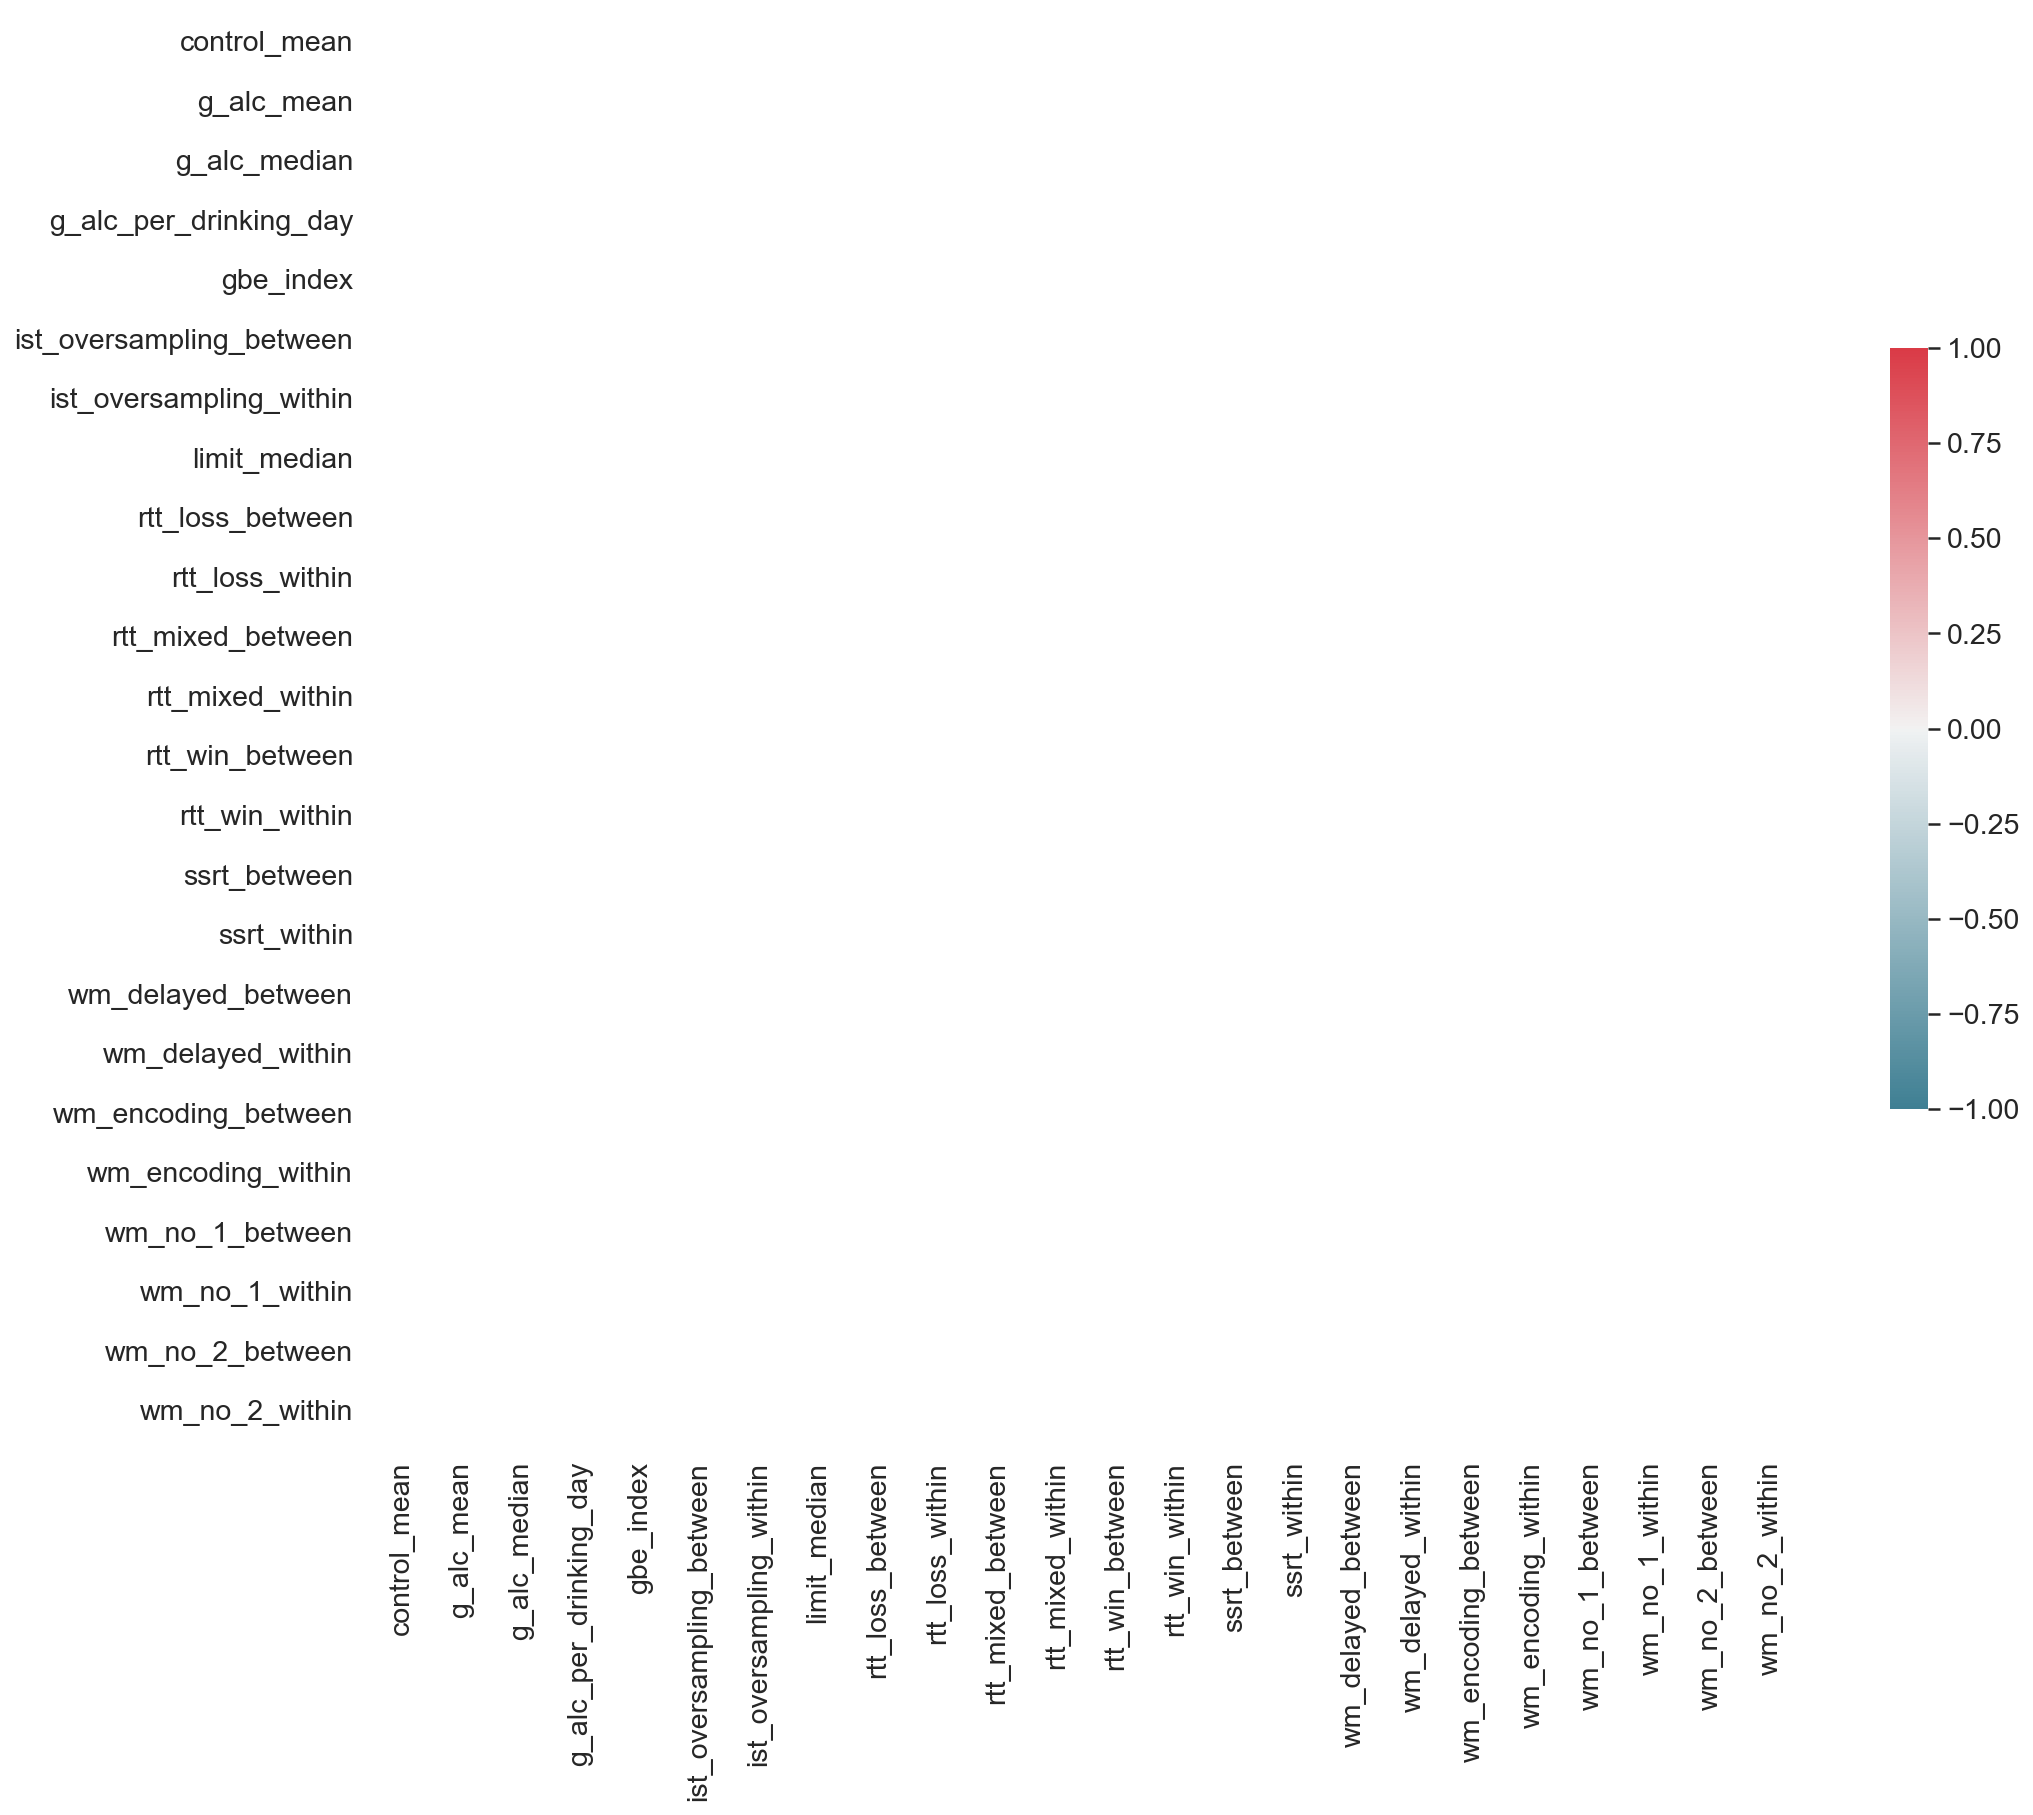

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
cor = cor.reset_index()#[cor.reset_index().gbe_index.isin(dp.get_gbe_data().query("trigger_date<@cutoff").index)].set_index('gbe_index')
columns = list(tasks.drop(columns = ['participant','session_number']))
cor = decompose_within_between(cor,columns = columns)
cor2 = cor.set_index('participant')
cor2 = (cor2-cor2.mean())/cor2.std()
correlation_matrix(cor2.drop(columns=['session_number']).reset_index(), corr_func = lmer_within_between, size = (16, 14))

#### Oversampling and consumption

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
columns = list(tasks.drop(columns = ['participant','session_number']))
cor2_d = decompose_within_between(cor,columns = columns)
#cor2_d = cor.set_index('participant')
#cor2 = (cor2-cor2.mean())/cor2.std()

In [ ]:
lmer_within_between('ist_oversampling_within', 'g_alc_median',cor2.reset_index(), model_output = True)

AttributeError: 'float' object has no attribute 'encode'

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ist_oversampling_within', y = 'g_alc_median', data = cor2_d,scatter_kws={'s':10})

In [ ]:
def binned_plot(x,y,df,bins):
    df['x_binned'] = pd.cut(df[x], 3)
    df = df.sort_values('x_binned')
    df['x_binned'] = df.x_binned.astype(str)
    _df = df.groupby('x_binned')[y].agg([np.mean, np.std]).reset_index()
    ax = _df.plot.bar(x = 'x_binned', y = 'mean',figsize=(10,6), legend = False, sort_columns = False)
    #plt.bar(x)
    #plt.errorbar(df['x_binned'].astype(str), df[y], yerr = _df['std'],fmt='o',ecolor = 'red',color='yellow')
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    
binned_plot('ist_oversampling_within', 'g_alc_median', cor2_d, 3)

In [ ]:
plot

In [ ]:
from scipy.stats import sem
plt.figure(figsize=(10,6))
cor2_d['limit_binned'] = pd.cut(cor2_d.ist_oversampling_within, 3)
plot = cor2_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std, sem]).reset_index()
plot['limit_binned'] = pd.Series([0,1,2])
ax = plot.plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('oversampling within')
plt.errorbar(plot['limit_binned'], plot['mean'], yerr = plot['sem'],fmt='o',ecolor = 'black',color='black', marker='None')

#### WM no encoding (fast) and consumption

In [ ]:
lmer_within_between('wm_no_2_within', 'g_alc_median',cor2.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_no_2_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### WM encoding and consumption

In [ ]:
lmer_within_between('wm_encoding_within', 'g_alc_median',cor2.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_encoding_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### WM delayed encoding and consumption

In [ ]:
lmer_within_between('wm_delayed_within', 'g_alc_median',cor2.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'wm_delayed_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### SSRT and consumption

In [ ]:
lmer_within_between('ssrt_within', 'g_alc_median',cor2.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ssrt_between', y = 'g_alc_median', data = cor2_d.groupby('participant').mean(),scatter_kws={'s':10})

#### SSRT and loss of control

In [ ]:
lmer_within_between('ssrt_within', 'control_mean',cor2.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'ssrt_within', y = 'control_mean', data = cor2_d,scatter_kws={'s':10})

In [ ]:
plt.figure(figsize=(10,6))
cor2_d['limit_binned'] = pd.cut(cor2_d.ssrt_within, 3)
plot = cor2_d.groupby('limit_binned').control_mean.agg([np.mean, np.std, sem]).reset_index()
plot['limit_binned'] = pd.Series([0,1,2])
ax = plot.plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('limit median')
ax.set_xlabel('SSRT within')
plt.errorbar(plot['limit_binned'], plot['mean'], yerr = plot['sem'],fmt='o',ecolor = 'black',color='black', marker='None')

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_mean','limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor4 = decompose_within_between(cor3.reset_index(),columns = columns)

In [ ]:
cor = pd.concat([drinking, tasks], axis = 1).dropna()
cor2 = cor.set_index('participant')
cor2 = (cor2-cor2.mean())/cor2.std()
correlation_matrix(cor2.reset_index().drop(columns = ['session_number']), corr_func = lmer, size = (12, 10))

In [ ]:
cor.limit_median.value_counts()

#### Intention and drinking

In [ ]:
%%R -i cor
require(lmer)
m <- lmer(wm_no_2 ~ as.factor(limit_median) + (1|participant), data = cor)
summary(m)

#### intention as factor

In [ ]:
%%R -i cor
require(lmer)
m <- lmer(wm_no_2 ~ as.factor(limit_median) + (1|participant), data = cor)
summary(m)

### Cross-sectional effects based on longitudinal data

In [ ]:
correlation_matrix(cor.groupby('participant').mean().reset_index().drop(columns = ['session_number']))

### Average longitudinal correlation per participant

In [ ]:
pps = cor.participant.unique()

In [ ]:
cor.groupby('participant').corr().reset_index().groupby('level_1').mean()

In [ ]:
cor.groupby('participant').corr().drop(columns=['session_number']).unstack()[['Mean consumption','Median consumption']].hist(figsize=(12,48), layout = (12,2), sharex=True);

## Factor score correlations

In [ ]:
factor_loadings = np.array([[ 7.92661829e-01,  4.78790772e-02,  4.86401575e-03],
       [ 7.63220032e-01, -1.40617072e-02,  3.25907524e-04],
       [ 7.49311048e-01, -2.53512341e-02, -1.37956558e-02],
       [ 8.18257813e-01,  1.04559605e-02, -9.31641296e-03],
       [ 4.63416842e-01, -7.38915150e-02,  1.43192654e-01],
       [ 1.79143311e-02, -2.67090047e-02,  8.60738590e-01],
       [ 7.90922395e-03,  9.98916460e-01, -1.35399086e-02],
       [-1.02745794e-01,  3.35920712e-01,  3.78108731e-01],
       [-7.42983269e-02, -1.32799950e-01, -6.17402248e-02]])

In [ ]:
import warnings
import numpy as np
from sklearn.preprocessing import scale

def matrix_sqrt(x):
    """
    Compute the square root of the eigen values (eVal),
    and then take $eVec * diag(eVals^0.5) * eVec^T$
    """
    evals, evecs = np.linalg.eig(x)
    evals[evals < 0] = np.finfo(float).eps
    sqrt_evals = np.sqrt(evals)
    return evecs.dot(np.diag(sqrt_evals)).dot(evecs.T)


def inv_matrix_sqrt(x):
    """
    Compute the inverse square root of the eigen values (eVal),
    and then take $eVec * diag(1 / eVals^0.5) * eVec^T$
    """
    evals, evecs = np.linalg.eig(x)
    if np.iscomplex(evals).any():
        warnings.warn('Complex eigen values detected; results are suspect.')
        return x
    evals[evals < np.finfo(float).eps] = 100 * np.finfo(float).eps
    inv_sqrt_evals =  1 / np.sqrt(evals)
    return evecs.dot(np.diag(inv_sqrt_evals)).dot(evecs.T)


def ten_berge(X, loadings, phi=None):
    """
    Estimate factor scores using the "ten Berge" method.

    Parameters
    ----------
    X : array-like
        The data set
    loadings : array-like
        The loadings matrix

    Reference
    ----------
    https://www.sciencedirect.com/science/article/pii/S0024379597100076
    """
    # get the number of factors from the loadings
    n_factors = loadings.shape[1]
    corr = np.corrcoef(X, rowvar=False)
    # if `phi` is None, create a diagonal matrix
    phi = np.diag(np.ones(n_factors)) if phi is None else phi
    # calculate intermediate metrics
    load = loadings.dot(matrix_sqrt(phi))
    corr_inv = inv_matrix_sqrt(corr)
    temp = corr_inv.dot(load)\
                   .dot(inv_matrix_sqrt(load.T.dot(np.linalg.inv(corr))
                                              .dot(load)))
    # calcualte weights
    weights = corr_inv.dot(temp)\
                      .dot(matrix_sqrt(phi))
    # calculate scores, given weights
    scores = scale(X).dot(weights)
    return scores

In [ ]:
tasks_session = tasks.set_index(['participant','session_number'])
tasks_session['ssrt'] = -tasks_session.ssrt

In [ ]:
import pickle
with open('../data/interim/fa.pkl', 'rb') as f:
    fa = pickle.load(f)

In [ ]:
factor_scores = pd.DataFrame(ten_berge(tasks_session, fa.loadings_))
factor_scores.columns = ['Factor_1','Factor_2','Factor_3']
factor_scores = pd.concat([tasks_session.reset_index(),factor_scores],axis = 1)
factor_scores['gbe_index'] = factor_scores.participant + '_' + factor_scores.session_number.apply(lambda x: '%03d'%int(x))

In [ ]:
factor_scores

In [ ]:
correlation_matrix(factor_scores.drop(columns = ['session_number','gbe_index']))

### Based on mixed models

In [ ]:
from trr265.stats import decompose_within_between

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_mean','limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor4 = decompose_within_between(cor3.reset_index(),columns = columns)


In [ ]:
lmer_within_between('Factor_1_within','g_alc_mean', cor4, model_output=True)

In [ ]:
def lmer(x, y, df):    
    R = biuR.wrapper.R()
    p = R("""
    library(lmerTest)
    library(ggeffects)
    # Running the model
    control=lmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e6))
    m = lmer(%(y)s ~ %(x)s + (1 | participant), data=df, na.action = na.exclude) 
    estimate = summary(m)$coefficients[2]
    p_value = summary(m)$coefficients[10]
    """%{'x':x,'y':y},push=dict(df=df))
    
    
    m = R("""m""")
    estimate = R("""estimate""")
    p_value = R("""p_value""")

    return estimate[0], p_value[0]

In [ ]:
from trr265.stats import decompose_within_between

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3 = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor3 = decompose_within_between(cor3.reset_index(),columns = columns, result='both', drop = False).set_index('participant')
cor3 = (cor3-cor3.mean())/cor3.std()
correlation_matrix(cor3.reset_index(), corr_func = lmer_within_between, size = (18,16))

#### Intention and consumption

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()
cor3_d = cor2.set_index('participant')
columns = ['limit_median','control_mean','Factor_1','Factor_2','Factor_3']
cor3_d = decompose_within_between(cor3_d.reset_index(),columns = columns, result='both', drop = False).set_index('participant')

In [ ]:
lmer_within_between('limit_median_within', 'g_alc_median',cor3.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'limit_median_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'limit_median_within', y = 'g_alc_median', data = cor3_d,scatter_kws={'s':10})

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.limit_median_within, 7)
ax = cor3_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('limit median')


#### Perceived control and consumption

In [ ]:
lmer_within_between('control_mean_within', 'g_alc_median',cor3.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'control_mean_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'control_mean_within', y = 'g_alc_median', data = cor3_d,scatter_kws={'s':10})

In [ ]:
plot

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.control_mean_within, 6)
plot = cor3_d.groupby('limit_binned').g_alc_median.agg([np.mean, np.std, sem]).reset_index()
plot['limit_binned'] = pd.Series([0,1,2,3,4,5])
ax = plot.reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('g/alc median')
ax.set_xlabel('control')
plt.errorbar(plot['limit_binned'], plot['mean'], yerr = plot['sem'],fmt='o',ecolor = 'black',color='black', marker='None')

#### Cognitive control and intention

In [ ]:
lmer_within_between('Factor_1_within', 'limit_median',cor3.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_between', y = 'limit_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_within', y = 'limit_median', data = cor3_d,scatter_kws={'s':10})

In [ ]:
plt.figure(figsize=(10,6))
cor3_d['limit_binned'] = pd.cut(cor3_d.Factor_1_within, 2)
ax = cor3_d.groupby('limit_binned').limit_median.agg([np.mean, np.std]).reset_index().plot.bar(x = 'limit_binned', y = 'mean',figsize=(10,6), legend = False)
ax.set_ylabel('limit median')
ax.set_xlabel('Factor 1 within')

#### Cognitive control and perceived control

In [ ]:
lmer_within_between('Factor_1_within', 'control_mean',cor3.reset_index(), model_output = True)

#### Cognitive control and consumption

In [ ]:
lmer_within_between('Factor_1_within', 'g_alc_median',cor3.reset_index(), model_output = True)

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x = 'Factor_1_between', y = 'g_alc_median', data = cor3_d.groupby('participant').mean(),scatter_kws={'s':10})

In [ ]:
cor4 = cor3.reset_index()

In [ ]:
stats.pearsonr(cor4['Factor_1'],cor4['Factor_3'])

In [ ]:
%%R -i cor4
require(lmerTest)
m <- lmer(Factor_3 ~ Factor_1 + (1|participant), data = cor4)
summary(m)

#### Intention as factor

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','session_number','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()

In [ ]:
%%R -i cor2
require(lmerTest)
m <- lmer(Factor_1 ~ as.factor(limit_median) + (1|participant), data = cor2)
summary(m)

In [ ]:
%%R -i cor2
require(lmerTest)
m <- lmer(g_alc_median ~ as.factor(limit_median) + (1|participant), data = cor2)
summary(m)

### Cross-sectional effects based on longitudinal data

In [ ]:
#factor_scores = factor_scores.set_index('gbe_index').filter(like='Factor')
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna().groupby('participant').mean().reset_index()

In [ ]:
correlation_matrix(cor2)

In [ ]:
from scipy import stats
stats.pearsonr(cor2['Factor_1'], cor2['g_alc_median'])

### Average longitudinal correlation per participant

In [ ]:
cor2 = pd.concat([drinking, factor_scores.set_index('gbe_index')[['participant','Factor_1','Factor_2','Factor_3']]], axis = 1).dropna()

In [ ]:
cor2.groupby('participant').corr().reset_index().groupby('level_1').mean()

## Hypotheses

- L1. Changes in inhibitory control relate negatively to real-life changes in drinking.
- L2. Changes in risk aversion for gains relate negatively to real-life changes in drinking.
- L3. Changes in risk aversion for losses relate positively to real-life changes in drinking.
- L4. Changes in loss aversion relate negatively to real-life changes in drinking.
- L5. Changes in sampling biases relate negatively to real-life changes in drinking.
- L6. Between-subject differences in working memory moderate the effects of changes in
inhibitory control and risk aversion on changes in drinking. Specifically, the expected positive and negative relationships between changes in inhibitory control as well as in risk aversion (see L1, L2, and L3) and drinking are stronger when working memory is low.
- L7. Between-subject differences in working memory moderate the effects of stress on drinking such that the positive relationship between stress and drinking is stronger when working memory is low.

### ToDo
- Decompose into between- and within-participant effects
- Check pre-registered model (interaction with WM)